# Developing Models to Predict Automobile Prices


## Objectives

-   Develop several models that will predict the price of cars using the features that were determined to be key during the exploratory analysis phase.

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Linear Regression and Multiple Linear Regression</a></li>
        <li><a href="#ref2">Polynomial Regression and Pipelines</a></li>
        <li><a href="#ref3">Measures for In-Sample Evaluation</a></li>
        <li><a href="#ref4">Prediction and Decision Making</a></li>
        <li><a href="#ref5">Conclusion</a></li>
    </ol>
</div>

<h4>Setup</h4>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<a id="ref1"></a> 
<h3>1. Linear Regression and Multiple Linear Regression</h3>

<h4>Linear Regression</h4>

Loading the modules for linear regression


In [3]:
from sklearn.linear_model import LinearRegression

Creating a linear regression object

In [4]:
lm = LinearRegression()
lm

LinearRegression()

<h4>Can Highway-mpg help predict car price?</h4>

Using simple linear regression, a linear function will be created with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [5]:
X = df[['highway-mpg']]
Y = df['price']

Fitting the linear model using highway-mpg.

In [6]:
lm.fit(X,Y)

LinearRegression()

Outputting a prediction 

In [7]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Viewing the intercept

In [9]:
lm.intercept_

38423.3058581574

Viewing the Slope


In [8]:
lm.coef_

array([-821.73337832])

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


<h4>Multiple Linear Regression</h4>

Oher good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
A model will be developed using these variables as the predictor variables.

In [9]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fitting the linear model using the four above-mentioned variables.

In [10]:
lm.fit(Z, df['price'])

LinearRegression()

In [11]:
lm.intercept_

-15806.624626329198

In [12]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

The linear function:

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<a id="ref2"></a> 
<h3>2)  Model Evaluation using Visualization</h3>


In [13]:
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

Visualizing **highway-mpg** as potential predictor variable of price:

(0.0, 48175.49776067697)

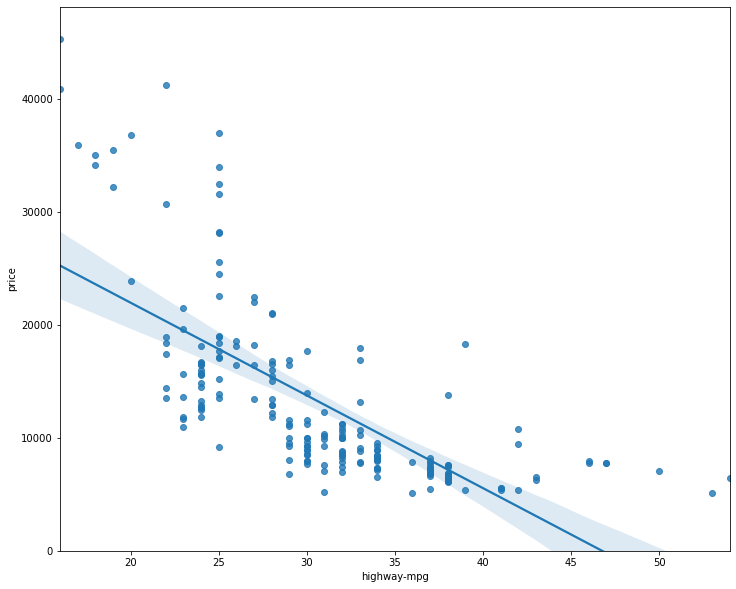

In [14]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Price is negatively correlated to highway-mpg, since the regression slope is negative.

(0.0, 47414.1)

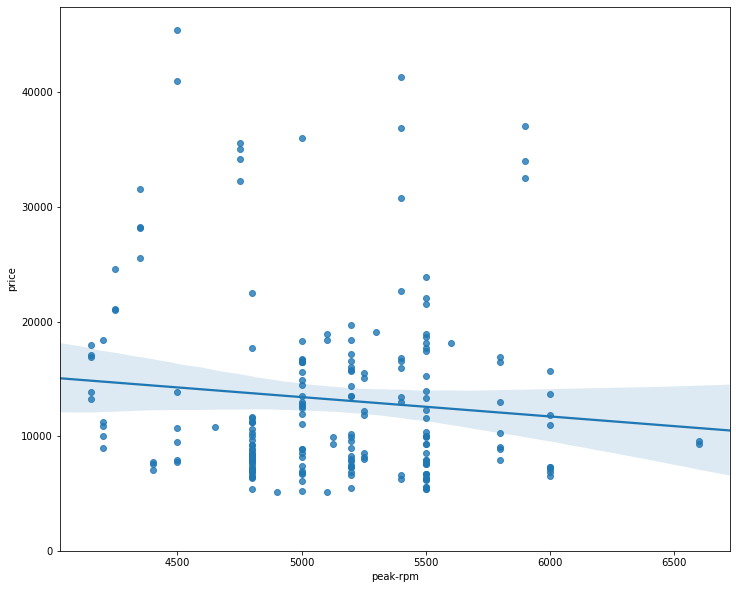

In [32]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

In [15]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to   "peak-rpm" which is approximate     -0.101616. 

<h3>Residual Plot</h3>

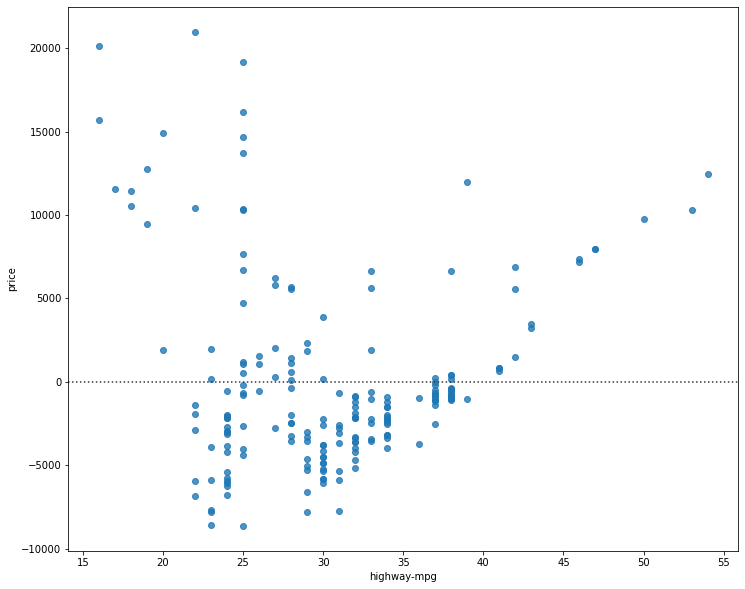

In [16]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

The residuals are not randomly spread around the x-axis, which infers that maybe a non-linear model is more appropriate for this data.

<h3>Multiple Linear Regression</h3>


In [17]:
Y_hat = lm.predict(Z)

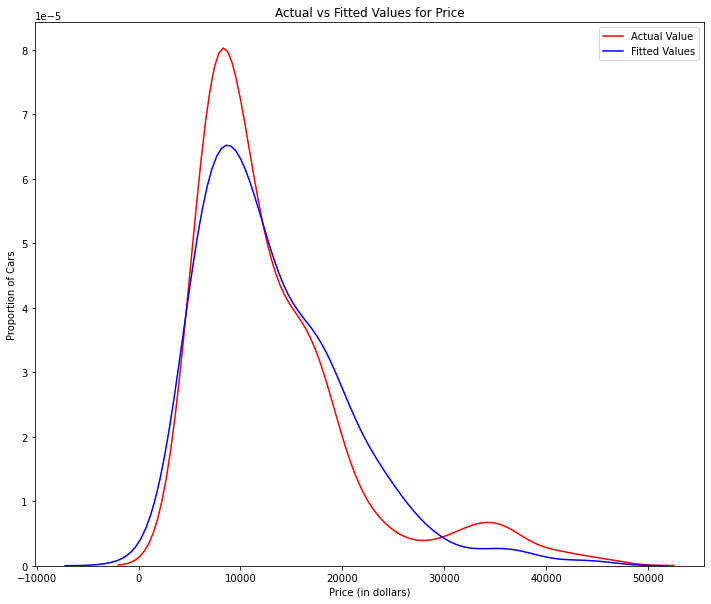

In [18]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

<a id="ref2"></a> 
<h2>2. Polynomial Regression and Pipelines</h2>

<p>Earlier, it was viewed that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Instead, a polynomial model will be fitted to the data.</p>

A function will be defined to plot:

In [19]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Getting the interested variables

In [20]:
x = df['highway-mpg']
y = df['price']

Fitting the polynomial using the function <b>polyfit</b>, then using the function <b>poly1d</b> to display the polynomial function.

In [21]:
# Here a polynomial of the 3rd order (cubic) is used
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Plotting the function 

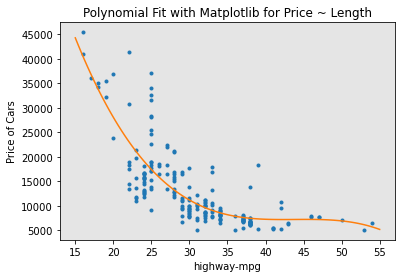

In [22]:
PlotPolly(p, x, y, 'highway-mpg')

In [23]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

This polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.

### Performing a polynomial transform on multiple features

In [24]:
from sklearn.preprocessing import PolynomialFeatures

Creating a <b>PolynomialFeatures</b> object of degree 2: 

In [25]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [26]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features 


In [27]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features


In [28]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creating the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [30]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Inputting the list as an argument to the pipeline constructor 

In [31]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Normalizing the data,  performing a transform and fitting the model simultaneously. 

In [32]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Normalizing the data, performing a transform and producing a prediction simultaneously.

In [33]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<a id="ref3"></a> 
<h2>3. Measures for In-Sample Evaluation</h2>

<h3>Model 1: Simple Linear Regression</h3>


Calculating the R^2

In [34]:
#highway_mpg_fit
lm.fit(X, Y)

print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [35]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [36]:
from sklearn.metrics import mean_squared_error

Comparing the predicted results with the actual results 

In [37]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>


Calculating the R^2

In [38]:
# fit the model 
lm.fit(Z, df['price'])

print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [39]:
Y_predict_multifit = lm.predict(Z)

Comparing the predicted results with the actual results 

In [40]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>


Calculating the R^2

In [41]:
from sklearn.metrics import r2_score

In [42]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


~ 67.419 % of the variation of price is explained by this polynomial fit

<h3>MSE</h3>


In [43]:
mean_squared_error(df['price'], p(x))

20474146.42636125

<a id="ref4"></a> 
<h2>4. Prediction and Decision Making</h2>
<h3>Prediction</h3>

In [44]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Creating a new input 

In [45]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fitting the model 

In [46]:
lm.fit(X, Y)
lm

LinearRegression()

Producing a prediction

In [47]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Plotting the data 

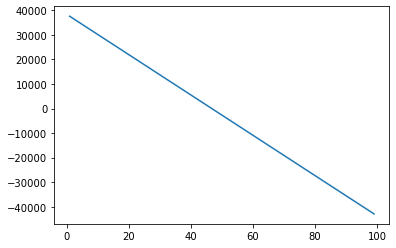

In [48]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>



<li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
<li><b>R-squared</b>: The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, it can be concluded that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<a id="ref5"></a> 
<h2>Conclusion:</h2>

<p>Comparing these three models, it can be concluded that <b>the MLR model is the best model</b> to be able to predict price from the dataset. This result makes sense, since there are 27 variables in total, and more than one of those variables are potential predictors of the final car price.</p>